In [7]:
import pandas as pd
import numpy as np
import P_Cyg as pc
import matplotlib.pyplot as plt
from glob import glob

In [8]:
intrinsic_dir = "C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/intrinsic_pols/"
files = glob(intrinsic_dir+"*")
retfiles = [f    for f in files if f[72]=='o']
rfiles = [f    for f in files if f[72]=='r']
dfs = [pd.read_csv(f)    for f in retfiles] + [pd.read_csv(f)    for f in rfiles]

##### Left Region: 6400-6475
##### Right Region: 6750-6800
##### Line Core: 6540-6600

In [9]:
def pfew_line_fit(w,pflux):
    lmask = np.where((w > 6400) & (w < 6475))
    rmask = np.where((w > 6750) & (w < 6800))
    left_point = pflux[lmask].mean()
    right_point = pflux[rmask].mean()
    rise = right_point - left_point
    run = 337.7
    m = rise/run
    funct = lambda x: m*(x-6437.5)+left_point
    return funct

def pfew_halpha(w,pol,flux):
    pflux = pol*flux
    continuum = pfew_line_fit(w,pflux)
    subbed = pflux - continuum(w)
    hmask = np.where((w>6540) & (w<6600))
    pol = subbed[hmask]/flux[hmask]
    hpol = np.mean(pol,axis=0)
    return hpol

def pfew(dfs):
    qs = [pfew_halpha(df.Wavelength.values,df.Q.values,df.Flux.values)    for df in dfs]
    us = [pfew_halpha(df.Wavelength.values,df.U.values,df.Flux.values)    for df in dfs]
    pol, pos = pc.polarization(qs,us)
    return qs,us,pol,pos

In [12]:
qs,us,pol,pos = pfew(dfs)
pol

array([0.05048038, 0.10726859, 0.09239498, 0.07241066, 0.07005968,
       0.06374047, 0.11082088, 0.05111545, 0.08088532, 0.09050178,
       0.06520082, 0.02047849, 0.03001124, 0.04432917, 0.03586629,
       0.08965216, 0.10594444, 0.19414752, 0.05343118, 0.08345871,
       0.10758945, 0.02294994, 0.04825988, 0.04863797, 0.09471742,
       0.08689792, 0.00333404, 0.04416868, 0.11956841, 0.08228462,
       0.04716602, 0.00996747, 0.04930923, 0.04547322, 0.0556326 ,
       0.07610698, 0.08076529, 0.06959094, 0.1651154 , 0.29316818,
       0.10911983, 0.09600574, 0.05737873, 0.08287616, 0.08895361,
       0.03658677, 0.03776205, 0.02135713, 0.04512716, 0.02483952,
       0.03367881, 0.00801492, 0.05183395, 0.0267252 , 0.0355036 ,
       0.01977971, 0.03544381, 0.02706194, 0.03243978, 0.0468985 ,
       0.03130536, 0.03878203, 0.05117353, 0.02010657, 0.02842948,
       0.06774179, 0.04373869, 0.09968631, 0.07136065, 0.04459904,
       0.02294532, 0.03268073, 0.09370529, 0.08308542, 0.05867

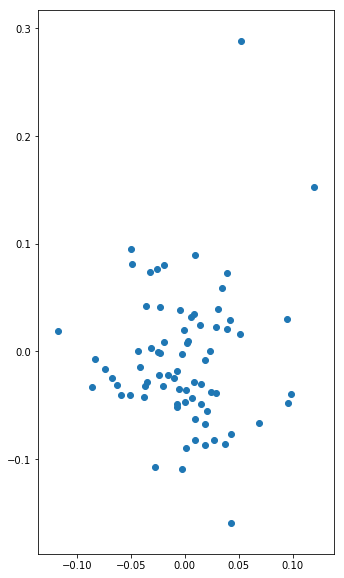

In [11]:
fig,ax = plt.subplots(1,figsize=(10,10))
ax.set_aspect('equal')
ax.scatter(qs,us)